In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
%matplotlib inline

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


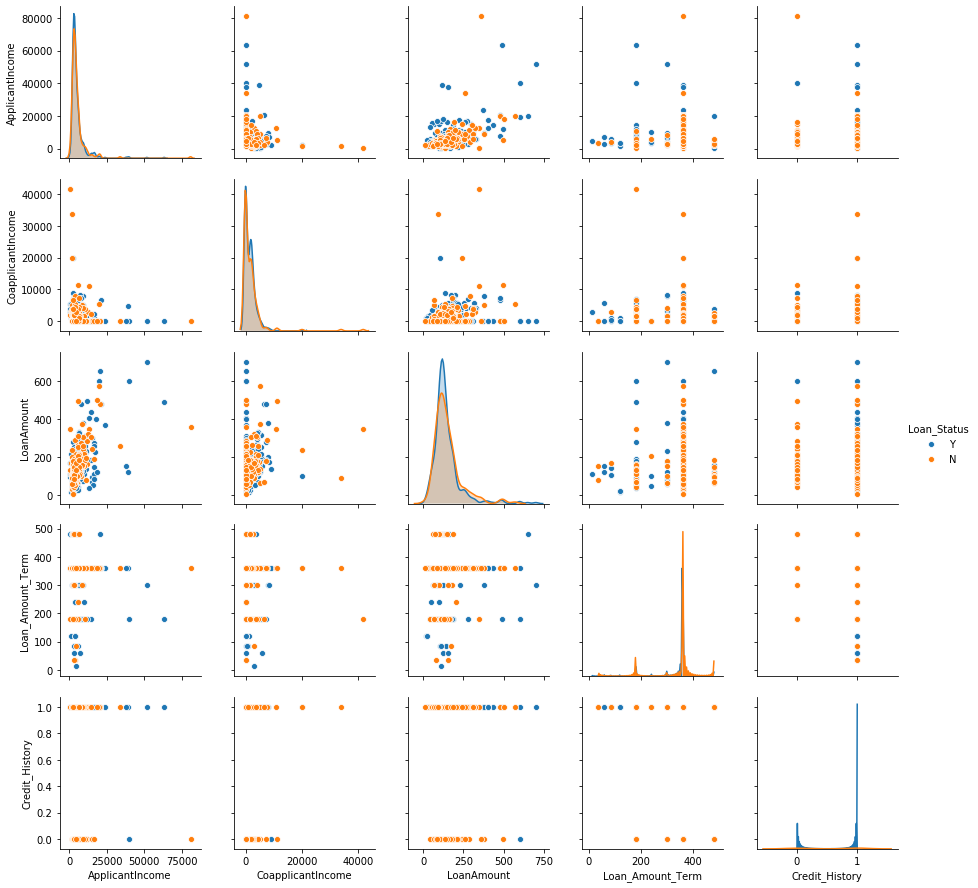

In [11]:
#vizualisation
import seaborn as sns
sns.pairplot(df,hue='Loan_Status')

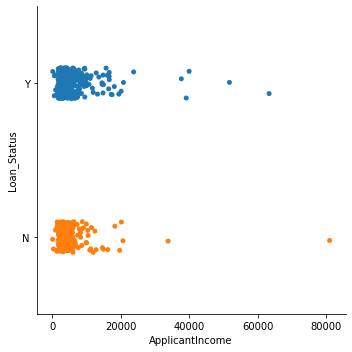

In [12]:
sns.catplot(x='ApplicantIncome', y = 'Loan_Status', data = df)

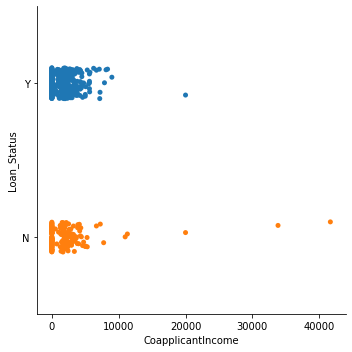

In [13]:
sns.catplot(x='CoapplicantIncome', y = 'Loan_Status', data = df)

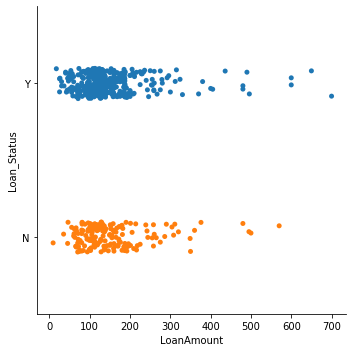

In [14]:
sns.catplot(x='LoanAmount', y = 'Loan_Status', data = df)

In [8]:
#preprocessing 
#check for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

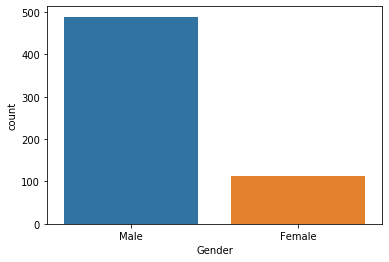

In [9]:
sns.countplot(df['Gender'])

In [15]:
#since male numbers are dominant therefore lets make null values as male
df['Gender'].fillna('Male',inplace = True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace= True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0] , inplace = True)

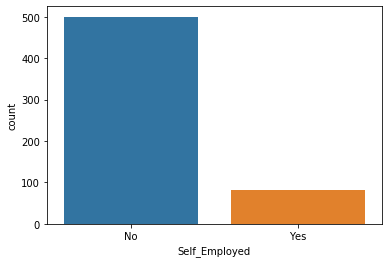

In [16]:
sns.countplot(df['Self_Employed'])

In [17]:
df['Self_Employed'].fillna('No',inplace = True)

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#preprocessing
X = df.iloc[:,[1,3,4,5,6,7,8,9,10,11]].values
Y = df.iloc[:,12].values

In [20]:
df.drop(columns=['Loan_ID','Married'],inplace = True)

In [21]:
df

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Male,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Male,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Male,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Male,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Male,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [ ]:
#getting dummies
df = pd.get_dummies(df)
df.drop(columns=['Gender_Male','Dependents_0','Education_Not Graduate','Self_Employed_Yes','Property_Area_Urban','Loan_Status_N'],inplace = True)

In [24]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0,0,0,0,1,1,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,1,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,0,0,0,1,0,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,0,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,0,0,0,1,1,0,0,1


In [25]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values


In [26]:

##Feature Scaling

In [27]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X)

array([[ 0.07299082, -0.55448733,  0.        , ...,  0.39260074,
        -0.64147818, -0.7820157 ],
       [-0.13441195, -0.03873155, -0.21927331, ...,  0.39260074,
         1.55889948, -0.7820157 ],
       [-0.39374734, -0.55448733, -0.957641  , ..., -2.54711697,
        -0.64147818, -0.7820157 ],
       ...,
       [ 0.43717437, -0.47240418,  1.26937121, ...,  0.39260074,
        -0.64147818, -0.7820157 ],
       [ 0.35706382, -0.55448733,  0.4833669 , ...,  0.39260074,
        -0.64147818, -0.7820157 ],
       [-0.13441195, -0.55448733, -0.15972753, ..., -2.54711697,
        -0.64147818,  1.2787467 ]])

In [28]:
#Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [29]:
#Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
#prediction
y_predict = classifier.predict(X_test)

In [31]:
#connfusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[27, 19],
       [28, 80]], dtype=int64)

In [32]:
print('accuracy is ',(29+83)/(29+83+19+23) *100,'%')

accuracy is  72.72727272727273 %
